# Chapter 5: Resampling Methods

## Cross-Validation

### Validation Set Approach

It involves randomly dividing the available set of observations into two parts, a training set and a validation set or hold-out set. The model is fit on the training set, and the fitted model is used to predict the responses for the observations in the validation set.

Two drawbacks are:

- The validation estimate of the test error rate can be highly variable, depending on precisely which observations are included in the training set and which observations are included in the validation set.

- Only a subset of the observations are used to fit the model, so that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

### LOOCV
**Leave-One-Out Cross-Validation**

Split observations into two parts, but the validation set is composed of a single observation. We repeat this $n$ times, every time training on the $n-1$ instances of the training set and testing on the single observation of the validation set.

Then we get
$$
        CV_{(n)} = \frac{1}{n}\sum^{n}_{i=1}MSE_i.
$$
where $MSE_i = (y_i - \hat{y}_i)^2$ for each single observation $(x_i, y_i)$ and relative predicted value $\hat{y}_i$.

It tends not to overestimate the test error rate and performing it multiple times always yields the same result.
It can be expensive to implement, but, **if using least squares linear or polynomial regression**, the following formula holds:
$$
        CV_{(n)} = \frac{1}{n}\sum^{n}_{i=1}(\frac{y_i-\hat{y}_i}{1-h_i})^2,
$$
where $\hat{y}_i$ is the fitted value from the least square fit and $h_i$ is the leverage.

### k-Fold Cross-Validation

The set of observation is divided into $k$ groups or folds of approximately equal size, and each time one of them is treated as validation set, while the other $k-1$ as training set.
Then we get
$$
        CV_{(k)} = \frac{1}{k}\sum^{k}_{i=1}MSE_i.
$$

Less computationally expensive than LOOCV, which is a special case of this when $k=n$.

### Bias-Variance Trade-Off

- high $k$, low bias, because, as $k$ grows, we train using more observations.

- high $k$, high variance, because we are averaging the output of models trained on very similar datasets, therefore the outputs are highly correlated, and the mean of many highly correlated quantities has higher variance then does the mean of many lower correlated quantities. 
**(NOT QUITE TRUE)**
see https://stats.stackexchange.com/questions/61783/bias-and-variance-in-leave-one-out-vs-k-fold-cross-validation

For classification, the same applies, replacing $MSE$ with $Err = I(y_i \neq \hat{y}_i)$

## Bootstrap

Powerful statistical tool that can quantify the uncertainty associated
with a given estimator.

Starting from a dataset $Z$, we randomly select $n$ observations to produce a
bootstrap dataset $Z^{*1}$. The sampling is performed **with replacement**!
So we can estimate a parameter $\alpha$ using each bootstrap dataset, so that from $Z^{*1}, Z^{*2}, ..., Z^{*m}$ we obtain $m$ corresponding estimates $\hat{\alpha}^{*1}, \hat{\alpha}^{*2}, ..., \hat{\alpha}^{*m}$.

Therefore, we can compute the standard error of these bootstrap estimates:
$$
SE_m(\hat{\alpha}) = \sqrt{\frac{1}{m-1}\sum^{m}_{r=1}\left(\hat{\alpha}^{*r}-\frac{1}{m}\sum^{m}_{r'=1}\hat{\alpha}^{*r'}\right)^2}
$$

# LAB

In [1]:
library(ISLR)
set.seed(1)

train=sample(392,196)

In [2]:
lm.fit=lm(mpg~horsepower, data=Auto, subset=train)

In [3]:
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3177 -3.5428 -0.5591  2.3910 14.6836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.283548   1.044352   39.53   <2e-16 ***
horsepower  -0.169659   0.009556  -17.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.032 on 194 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.6171 
F-statistic: 315.2 on 1 and 194 DF,  p-value: < 2.2e-16


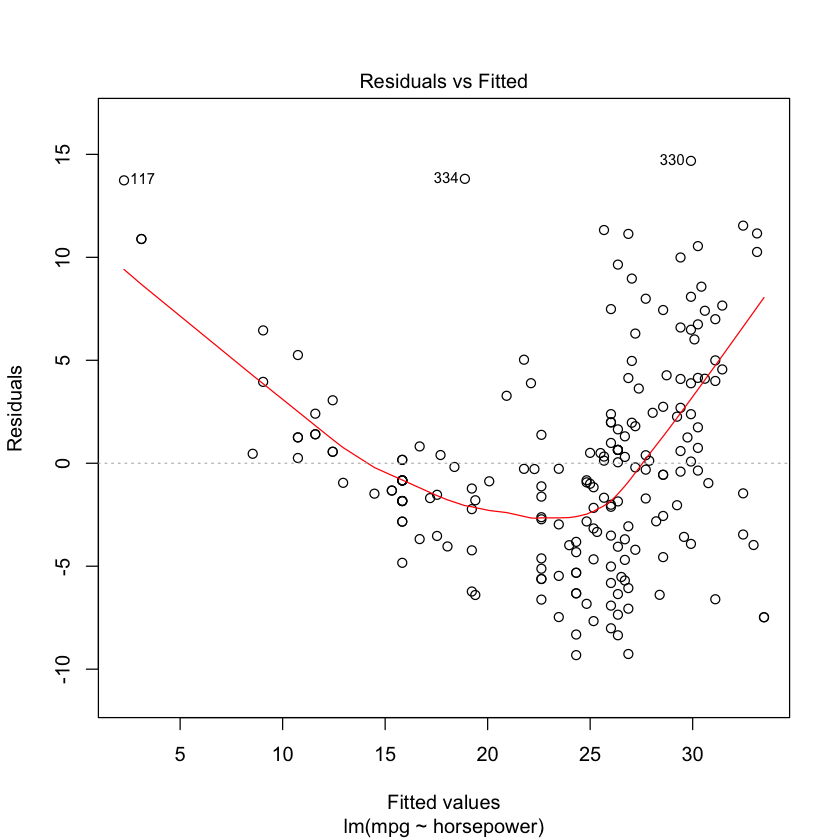

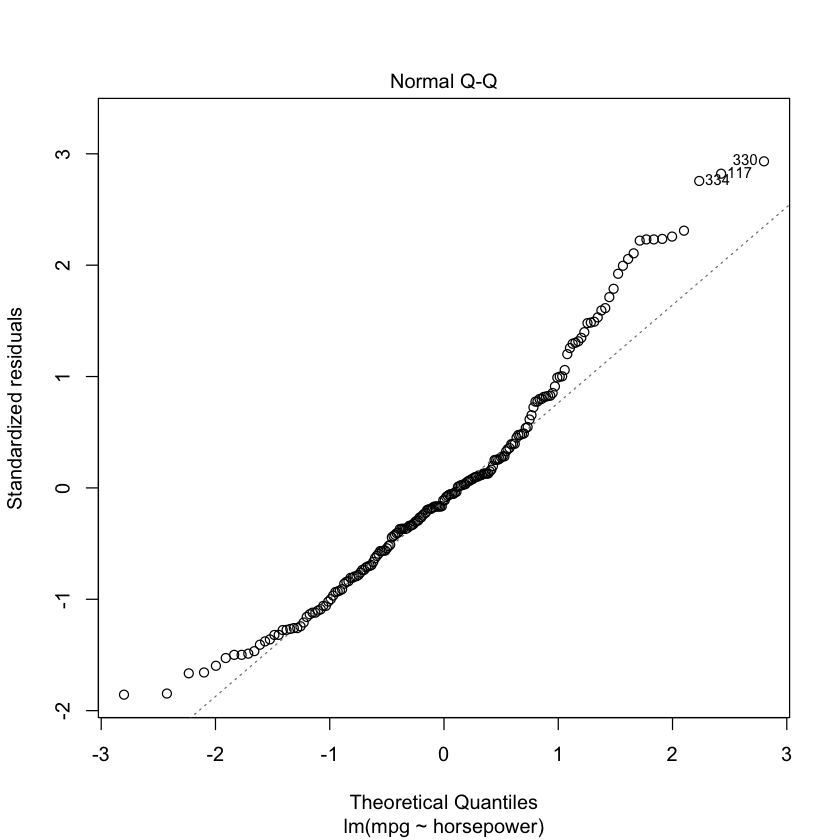

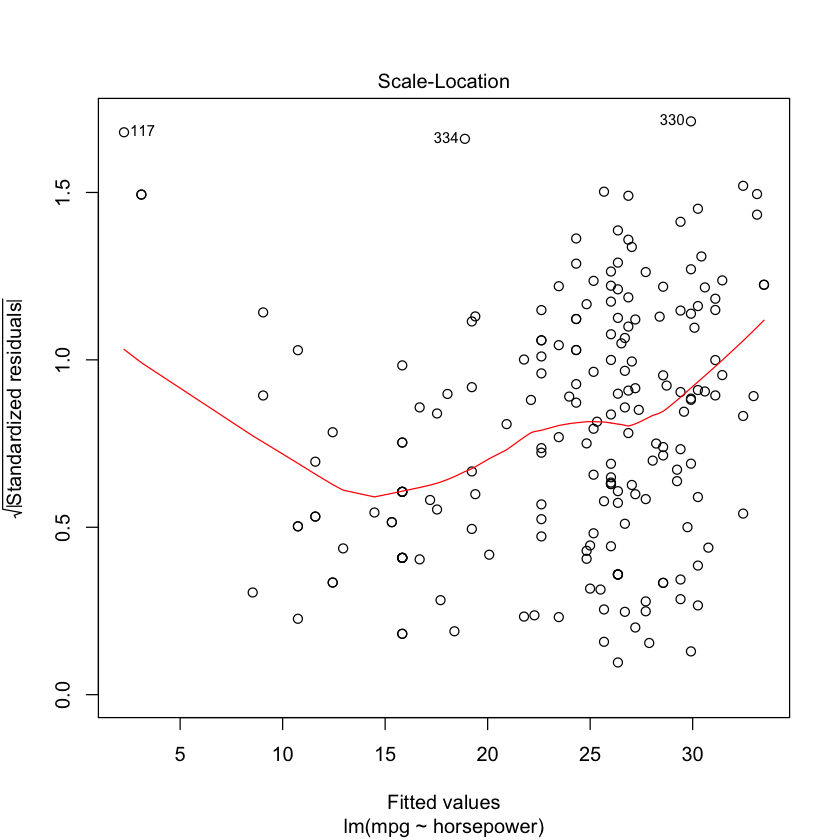

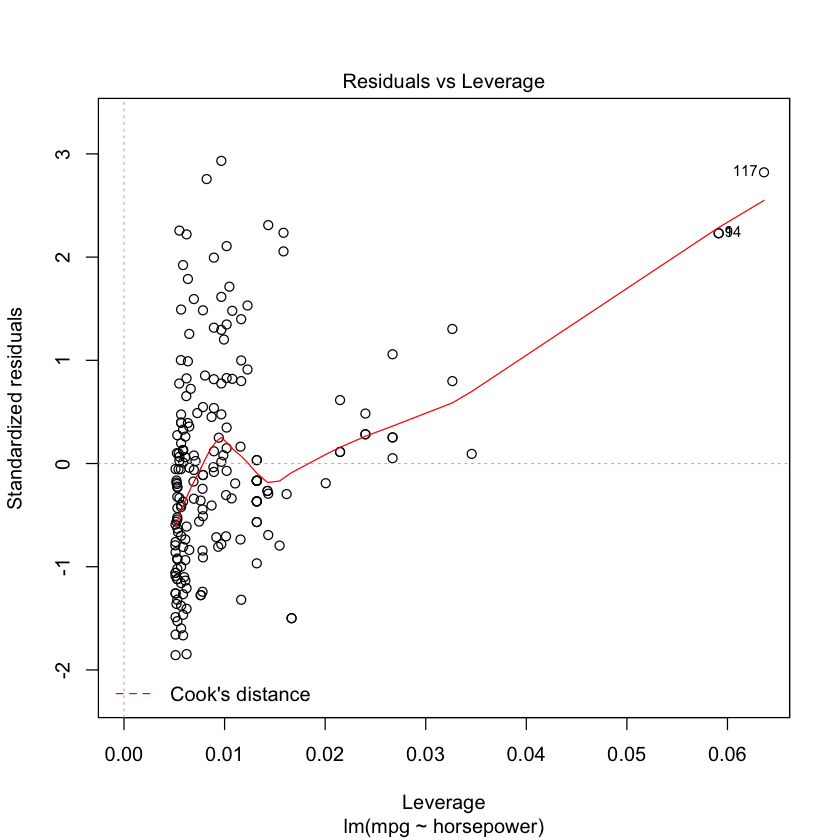

In [4]:
par(bg="white")
plot(lm.fit)

In [5]:
attach(Auto)
mean((mpg-predict(lm.fit, Auto))[-train]^2)

[1] 23.26601

In [10]:
lm.fit2 = lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 18.71646

In [11]:
lm.fit3 = lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3, Auto))[-train]^2)

[1] 18.79401

changing seed would lead to different results

In [13]:
library(boot)
glm.fit = glm(mpg~horsepower,data=Auto)
cv.err = cv.glm(Auto,glm.fit)

In [15]:
cv.err$delta

[1] 24.23151 24.23114